<a href="https://colab.research.google.com/github/Aadi010105/AI-Driven-B2B-Lead-Scoring-and-Account-Based-Marketing-ABM-Optimization-System/blob/main/Sales_predict_RL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
advertising = pd.DataFrame(pd.read_csv("advertising.csv"))
advertising.sample(5)

,TV,Radio,Newspaper,Sales
167,206.8,5.2,19.4,17.2
22,13.2,15.9,49.6,5.6
186,139.5,2.1,26.6,10.3
80,76.4,26.7,22.3,11.8
9,199.8,2.6,21.2,15.6


In [6]:
advertising.shape


(200, 4)

In [7]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


Data Cleaning

In [9]:
advertising.isnull().sum()*100/advertising.shape[0]

,0
TV,0.0
Radio,0.0
Newspaper,0.0
Sales,0.0


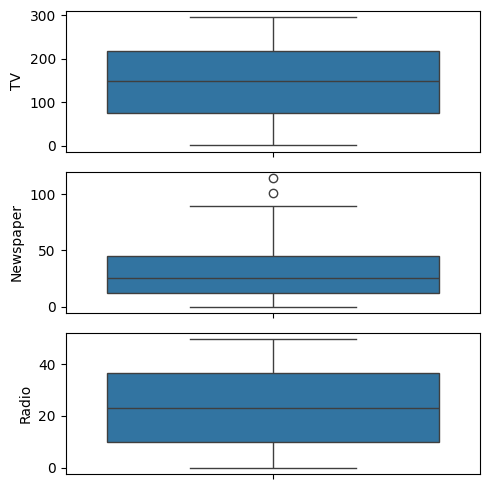

In [10]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

Univariate Analysis

Sales (Target Variable)

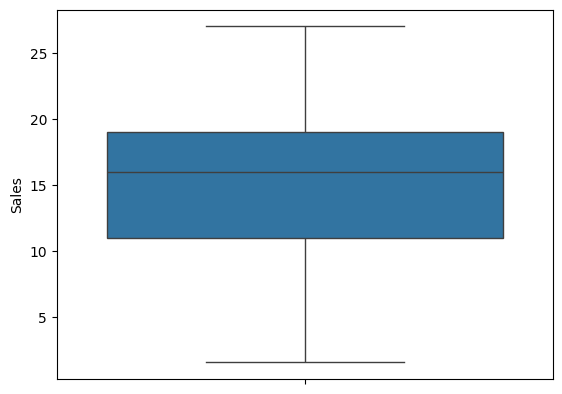

In [11]:
sns.boxplot(advertising['Sales'])
plt.show()

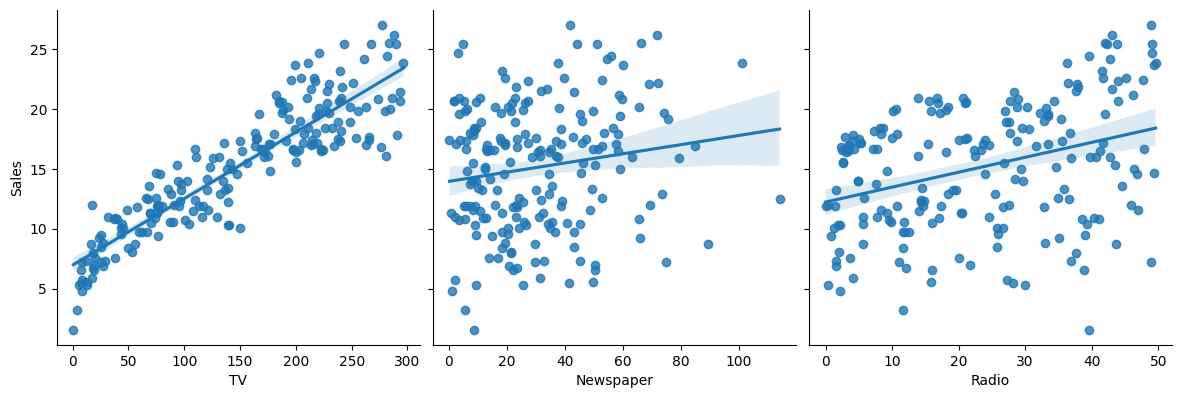

In [16]:
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='reg')
plt.show()

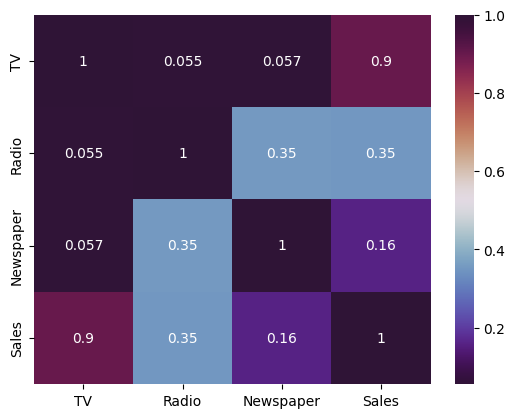

In [25]:
sns.heatmap(advertising.corr(), cmap="twilight_shifted", annot = True)
plt.show()

# Model Building

In [26]:
X = advertising['TV']
y = advertising['Sales']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [32]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [31]:
y_train.head()


,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [33]:
import statsmodels.api as sm

In [34]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm).fit()

In [35]:
lr.params

,0
const,6.948683
TV,0.054546


In [36]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 12 Jan 2025   Prob (F-statistic):           1.52e-52
Time:                        12:37:43   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

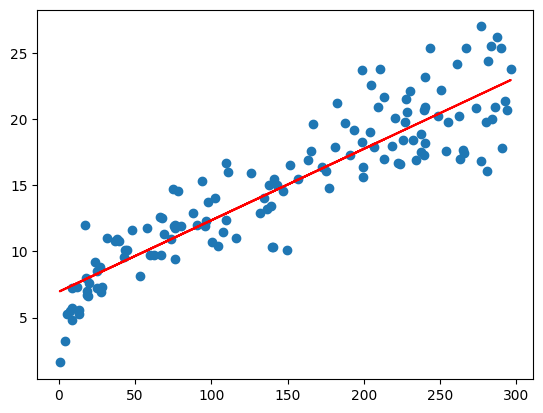

In [37]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

## Model Evaluation

In [38]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

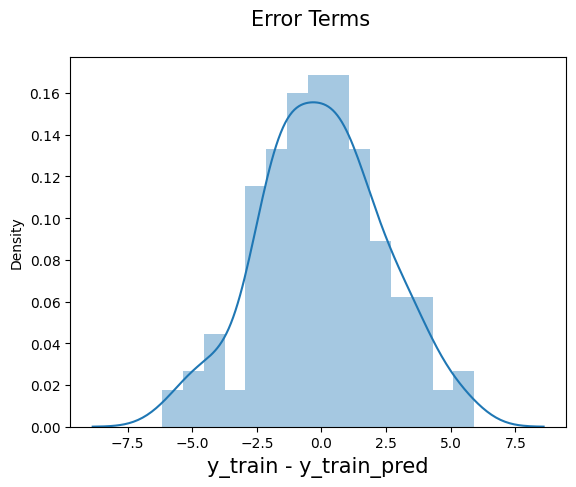

In [44]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

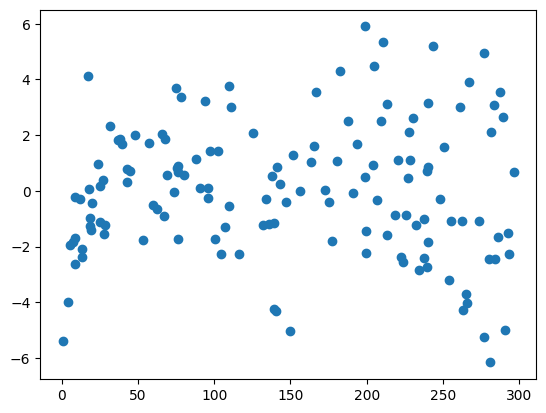

In [41]:
plt.scatter(X_train,res)
plt.show()

Predictions on the Test Set

In [45]:
X_test_sm = sm.add_constant(X_test)
y_pred = lr.predict(X_test_sm)

In [46]:
y_pred.head()

,0
126,7.374140
104,19.941482
99,14.323269
92,18.823294
111,20.132392


In [47]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

Root Mean Squared Error(RMSE)

In [48]:
np.sqrt(mean_squared_error(y_test, y_pred))

2.019296008966232

In [49]:
r_squared = r2_score(y_test, y_pred)
r_squared

0.792103160124566

*Visualizing the fit on the test set*

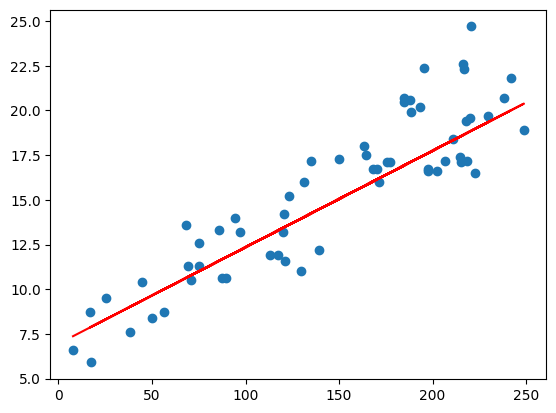

In [50]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()